<a href="https://colab.research.google.com/github/Ayushraj6202/Early-Stopping-and-Dropout-layer/blob/main/Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Dropout

In [3]:
data=pd.read_csv("/content/drive/MyDrive/DL/2/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

as above we can see corelation of BloodPressure and SkinTHickness is very less, drop these column

In [5]:
data.drop(columns=["BloodPressure","SkinThickness"],axis=1,inplace=True)

In [6]:
data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [7]:
import matplotlib.pyplot as plt


<Axes: xlabel='Outcome'>

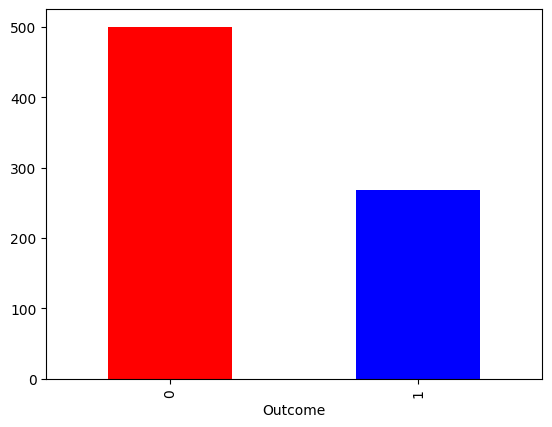

In [8]:
data["Outcome"].value_counts().plot(kind='bar',color=['Red','Blue'])

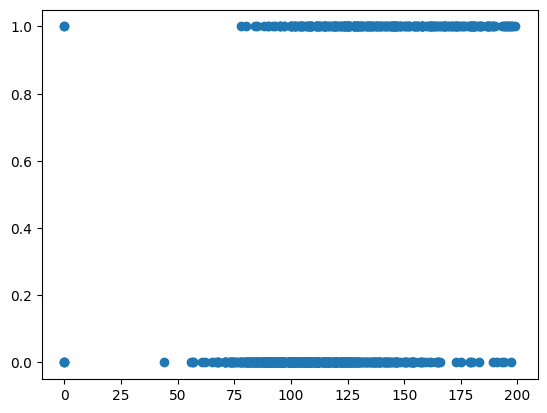

In [9]:
plt.scatter(data["Glucose"],data["Outcome"])

In [10]:
X=data.iloc[:,:-1]
Y=data["Outcome"]

In [11]:
X.shape

(768, 6)

##Early stopping and Droupout

In [12]:
from tensorflow.keras import Sequential

In [13]:
model=Sequential()
model.add(Dense(128,activation="relu",input_dim=X.shape[1]))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [15]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
history=model.fit(X,Y,epochs=500,validation_split=0.2,batch_size=1,callbacks=callback)

Epoch 1/500
614/614 [==============================] - 5s 4ms/step - loss: 1.0728 - accuracy: 0.5603 - val_loss: 0.7577 - val_accuracy: 0.6364
Epoch 2/500
614/614 [==============================] - 2s 4ms/step - loss: 0.7567 - accuracy: 0.5945 - val_loss: 0.6924 - val_accuracy: 0.6234
Epoch 3/500
614/614 [==============================] - 3s 4ms/step - loss: 0.6852 - accuracy: 0.6287 - val_loss: 0.7175 - val_accuracy: 0.5519
Epoch 4/500
614/614 [==============================] - 3s 5ms/step - loss: 0.6620 - accuracy: 0.6433 - val_loss: 0.6940 - val_accuracy: 0.5390
Epoch 5/500
614/614 [==============================] - 3s 5ms/step - loss: 0.6495 - accuracy: 0.6710 - val_loss: 0.6554 - val_accuracy: 0.6883
Epoch 6/500
614/614 [==============================] - 2s 3ms/step - loss: 0.6347 - accuracy: 0.6808 - val_loss: 0.6699 - val_accuracy: 0.6494
Epoch 7/500
614/614 [==============================] - 2s 3ms/step - loss: 0.6330 - accuracy: 0.6629 - val_loss: 0.6594 - val_accuracy: 0.6169

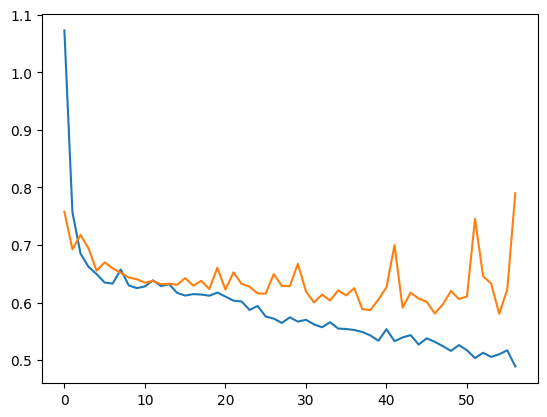

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

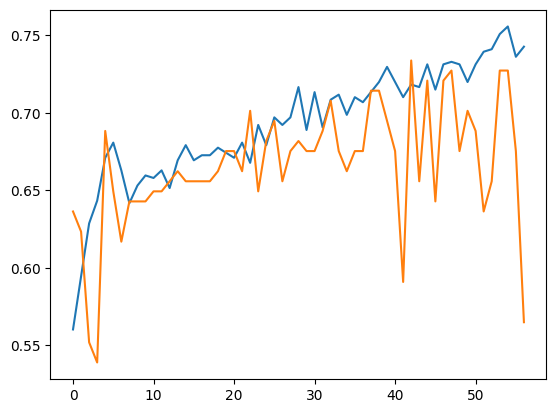

In [17]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [18]:
model=Sequential()
model.add(Dense(32,activation="relu",input_dim=X.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
history=model.fit(X,Y,epochs=500,validation_split=0.2,batch_size=1,callbacks=callback)

Epoch 1/500
614/614 [==============================] - 4s 4ms/step - loss: 5.8860 - accuracy: 0.5147 - val_loss: 0.9724 - val_accuracy: 0.5779
Epoch 2/500
614/614 [==============================] - 2s 3ms/step - loss: 2.2688 - accuracy: 0.5472 - val_loss: 0.8573 - val_accuracy: 0.5065
Epoch 3/500
614/614 [==============================] - 2s 3ms/step - loss: 1.1124 - accuracy: 0.5993 - val_loss: 0.6646 - val_accuracy: 0.6364
Epoch 4/500
614/614 [==============================] - 3s 5ms/step - loss: 0.8210 - accuracy: 0.6124 - val_loss: 0.6583 - val_accuracy: 0.6429
Epoch 5/500
614/614 [==============================] - 2s 4ms/step - loss: 0.7263 - accuracy: 0.6336 - val_loss: 0.6577 - val_accuracy: 0.6429
Epoch 6/500
614/614 [==============================] - 2s 3ms/step - loss: 0.6887 - accuracy: 0.6433 - val_loss: 0.6547 - val_accuracy: 0.6429
Epoch 7/500
614/614 [==============================] - 2s 3ms/step - loss: 0.6645 - accuracy: 0.6564 - val_loss: 0.6528 - val_accuracy: 0.6429

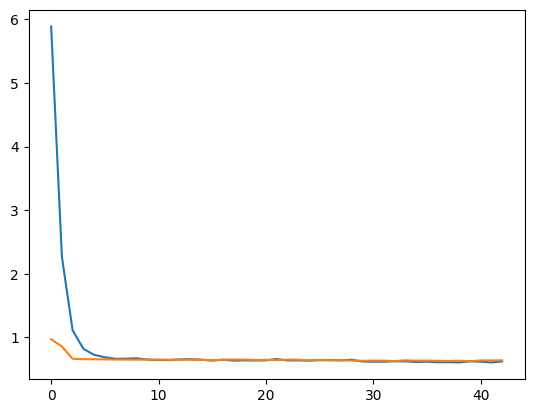

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

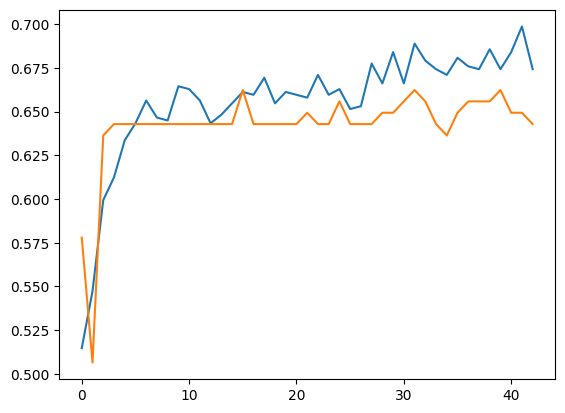

In [21]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])